In [1]:
import pandas as pd
import numpy as np
import vertica_python
import os
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
username = os.getenv('VERTICA_USERNAME')
password = os.getenv('VERTICA_PASSWORD')
conn_info = {'host': 'warehouse.analytics.edx.org',
             'port': 5433,
             'user': username,
             'password': password,
             'database': 'warehouse',
             'read_timeout': 600,
             'unicode_error': 'strict',
             'ssl': False}

In [4]:
query = """

select
a.user_id,
a.course_id,
c.pacing_type,
a.passed_timestamp,
b.content_availability_date,
DATEDIFF('day', b.content_availability_date, a.passed_timestamp) AS days_to_complete
from ahemphill.course_completion_consolidated a 
join ahemphill.user_content_availability_date b 
on a.user_id = b.user_id
and a.course_id = b.course_id
and a.passed_timestamp is not null
and b.content_availability_date >= '2017-01-01'
join business_intelligence.course_master c
on a.course_id = c.course_id

"""

In [5]:
connection = vertica_python.connect(**conn_info)

cur = connection.cursor('dict')

cur.execute(query)
extract = cur.fetchall()
df = pd.DataFrame(extract)

connection.close()

In [6]:
df_comp_count = df.groupby('course_id').count()['days_to_complete'].reset_index()

In [7]:
df_merged = df.merge(df_comp_count, on = 'course_id', how = 'inner')

In [8]:
df_merged.sort_values('days_to_complete_x')

,user_id,course_id,pacing_type,passed_timestamp,content_availability_date,days_to_complete_x,days_to_complete_y
81236,7214312,course-v1:IMFx+TADAT_Exam+3T2016,instructor_paced,2016-12-09 07:52:38.000000,2030-01-01,-4771,6
81239,12793800,course-v1:IMFx+TADAT_Exam+3T2016,instructor_paced,2017-01-12 15:18:26.000000,2030-01-01,-4737,6
81238,12183836,course-v1:IMFx+TADAT_Exam+3T2016,instructor_paced,2017-01-13 16:52:36.000000,2030-01-01,-4736,6
81237,11427074,course-v1:IMFx+TADAT_Exam+3T2016,instructor_paced,2017-01-18 17:06:19.000000,2030-01-01,-4731,6
81240,12802473,course-v1:IMFx+TADAT_Exam+3T2016,instructor_paced,2017-01-24 13:18:35.000000,2030-01-01,-4725,6
81241,13220463,course-v1:IMFx+TADAT_Exam+3T2016,instructor_paced,2017-01-27 16:12:12.000000,2030-01-01,-4722,6
101992,13884999,course-v1:MITx+STL.161x+1T2017,instructor_paced,2017-04-05 05:32:23.000000,2030-01-01,-4654,20
102008,14047583,course-v1:MITx+STL.161x+1T2017,instructor_paced,2017-04-06 07:59:58.000000,2030-01-01,-4653,20
101993,13978246,course-v1:MITx+STL.161x+1T2017,instructor_paced,2017-04-16 12:11:23.000000,2030-01-01,-4643,20
101991,13457033,course-v1:MITx+STL.161x+1T2017,instructor_paced,2017-04-17 11:11:03.000000,2030-01-01,-4642,20


In [18]:
for i in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]:
#     value = df_merged[(df_merged.days_to_complete_x > 3)
#                       & (df.pacing_type=='instructor_paced')
#                      ].quantile(i)['days_to_complete_x']
    value = df_merged[
        (df_merged.days_to_complete_y > 100) &
         (df_merged.pacing_type=='instructor_paced')
         ].groupby('course_id').mean()['days_to_complete_x'].quantile(i)
    
    print ('At the %ith percentile, we need to wait %i days to measure completion' % (i*100, value))

At the 50th percentile, we need to wait 34 days to measure completion
At the 60th percentile, we need to wait 40 days to measure completion
At the 70th percentile, we need to wait 50 days to measure completion
At the 80th percentile, we need to wait 56 days to measure completion
At the 90th percentile, we need to wait 76 days to measure completion
At the 95th percentile, we need to wait 84 days to measure completion


TypeError: slice indices must be integers or None or have an __index__ method

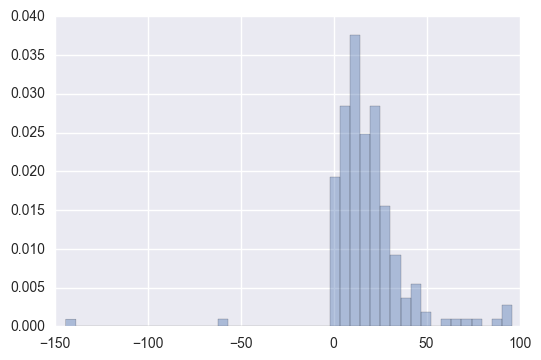

In [19]:
sns.distplot(df_merged[(df_merged.days_to_complete_y > 100) &
         (df_merged.pacing_type=='self_paced')].groupby('course_id').median()['days_to_complete_x'],
            kde = True)